In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

In [ ]:
filename = "wav-example-file-download-1min.wav"  

# Load audio file
# y = numpy array of audio samples
# sr = sampling rate (samples per second)
# sr=None keeps the original sampling rate
y, sr = librosa.load(filename, sr=None)

# Calculate duration of audio in seconds
duration = librosa.get_duration(y=y, sr=sr)

print(f"Audio duration: {duration:.2f} sec, Sampling rate: {sr} Hz")

Audio duration: 59.87 sec, Sampling rate: 44100 Hz


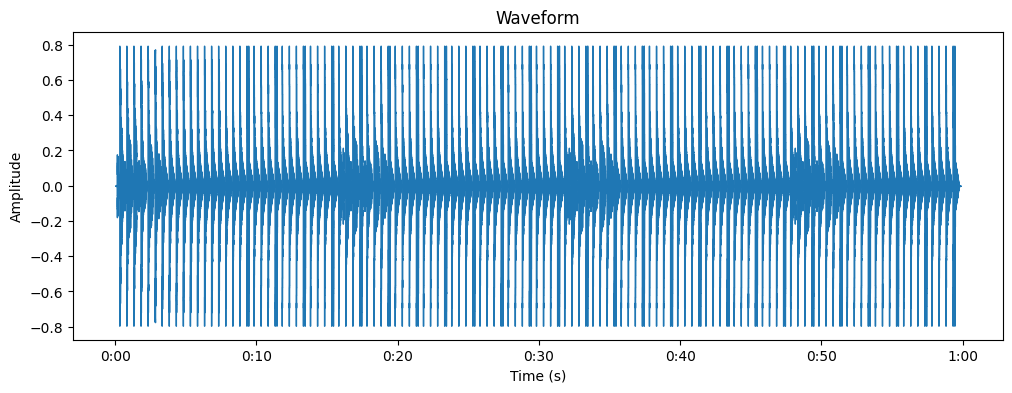

In [ ]:
# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

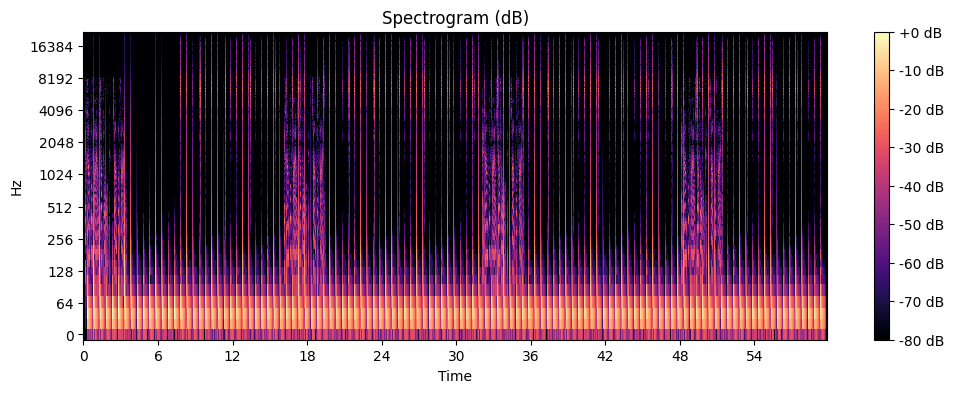

In [ ]:
# Plot spectrogram
D = librosa.stft(y) # Compute Short-Time Fourier Transform (STFT)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) # Convert amplitudes to decibels

plt.figure(figsize=(12, 4))
# Display spectrogram with time on X-axis, frequency (log scale) on Y-axis
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB') # Show decibel scale
plt.title('Spectrogram (dB)')
plt.show()

# A spectrogram lets us see distortions, hiss, pops, or unusual frequency spikes.
# For example:
# Sharp vertical lines = clicks/pops
# High-frequency noise = hiss
# Dropouts = silent horizontal bands

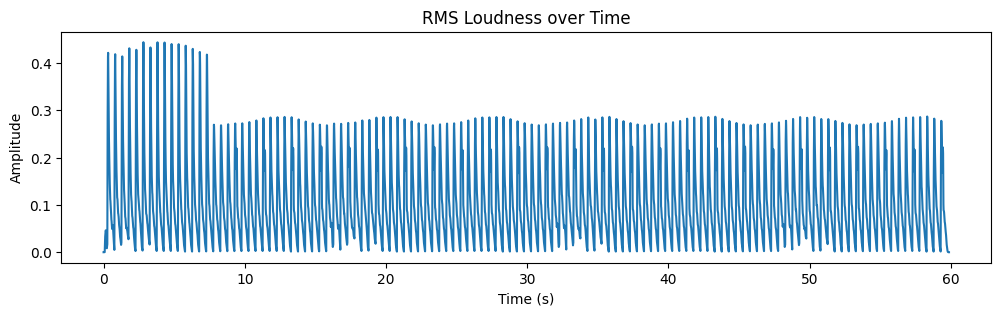

In [ ]:
# Plot RMS /loudness over time
rms = librosa.feature.rms(y=y)[0] # Compute Root Mean Square (RMS) amplitude
frames = range(len(rms))  # Create indices for RMS frames
t = librosa.frames_to_time(frames, sr=sr)  # Convert frame indices to time in seconds

plt.figure(figsize=(12, 3))
plt.plot(t, rms) # Plot RMS over time
plt.title("RMS Loudness over Time")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()



# Low RMS = potential dropouts or silence
# High RMS = spikes or clipping

Clipping detected in 0.01% of samples


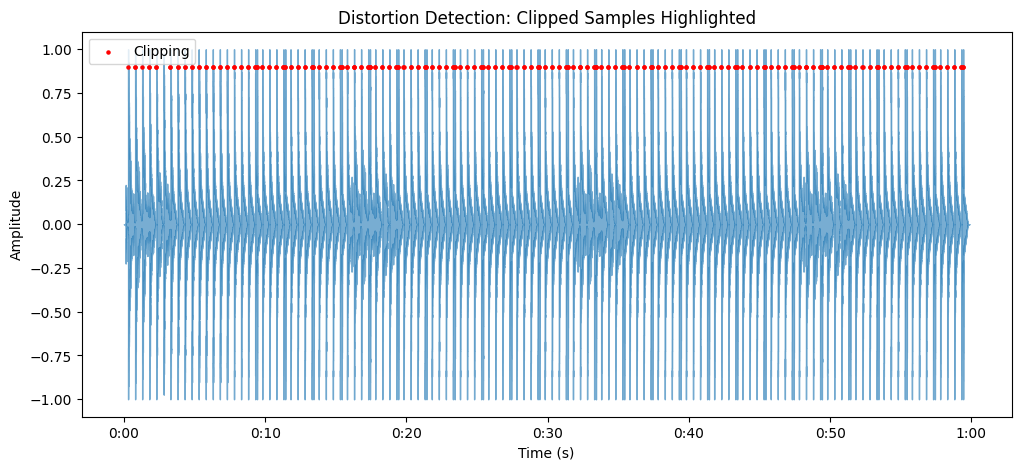

=== Distortion Summary ===
Sampling Rate: 44100 Hz
Duration: 59.87 seconds
Total Clipped Samples: 292
Distortion Likely Around: [0.03482993 0.04643991 0.05804989 0.06965986 0.08126984 7.79029478
 7.80190476 7.81351474 7.82512472 8.28952381] seconds (first 10 shown)


In [ ]:
# Distortion Detection
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load("wav-example-file-download-1min.wav", sr=None)

# Normalize audio (so amplitude is between -1 and 1)
y = y / np.max(np.abs(y))

# Detect clipping
clip_threshold = 0.98  # near max amplitude
clipped = np.abs(y) > clip_threshold
clip_ratio = np.sum(clipped) / len(y)

print(f"Clipping detected in {clip_ratio * 100:.2f}% of samples")


# Identify distorted segments
# Convert boolean array to time points
clipped_frames = np.where(clipped)[0]
clipped_times = clipped_frames / sr

# Spectral analysis for extra confirmation
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroid))
t = librosa.frames_to_time(frames, sr=sr)

# Mark areas of potential distortion where centroid is very high
threshold = np.mean(spectral_centroid) + 2 * np.std(spectral_centroid)
distorted_regions = t[spectral_centroid > threshold]

# Visualization
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.scatter(clipped_times, np.ones_like(clipped_times)*0.9, color='r', s=5, label='Clipping')
plt.title("Distortion Detection: Clipped Samples Highlighted")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Summary
print("=== Distortion Summary ===")
print(f"Sampling Rate: {sr} Hz")
print(f"Duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds")
print(f"Total Clipped Samples: {np.sum(clipped)}")
print(f"Distortion Likely Around: {distorted_regions[:10]} seconds (first 10 shown)")




Clipping detected in 0.00% of samples


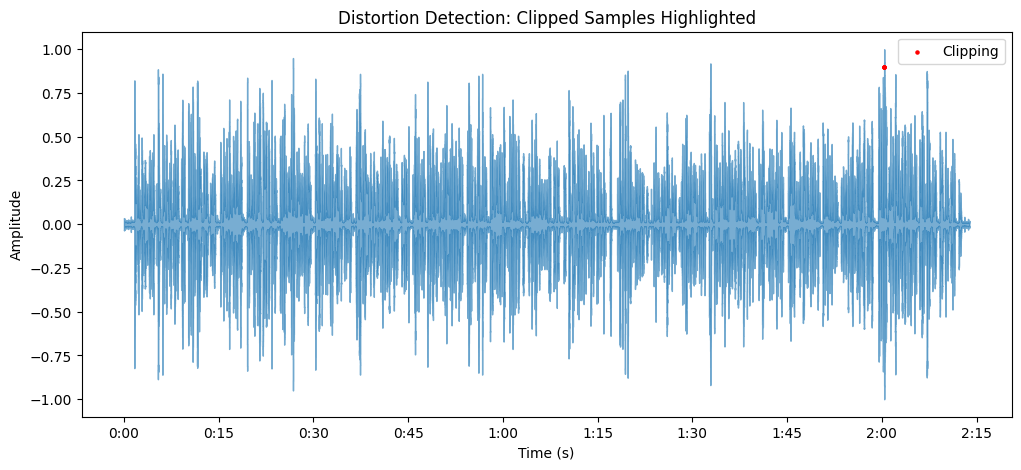

=== Distortion Summary ===
Sampling Rate: 44100 Hz
Duration: 133.89 seconds
Total Clipped Samples: 4
Distortion Likely Around: [1.95047619 1.96208617 1.97369615 1.98530612 1.9969161  2.3568254
 2.36843537 2.38004535 2.43809524 2.44970522] seconds (first 10 shown)


In [ ]:
# Distortion Detection
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load("Audio Recording on Wednesday afternoon.wav", sr=None)

# Normalize audio (so amplitude is between -1 and 1)
y = y / np.max(np.abs(y))

# Detect clipping
clip_threshold = 0.98  # near max amplitude
clipped = np.abs(y) > clip_threshold
clip_ratio = np.sum(clipped) / len(y)

print(f"Clipping detected in {clip_ratio * 100:.2f}% of samples")


# Identify distorted segments
# Convert boolean array to time points
clipped_frames = np.where(clipped)[0]
clipped_times = clipped_frames / sr

# Spectral analysis for extra confirmation
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroid))
t = librosa.frames_to_time(frames, sr=sr)

# Mark areas of potential distortion where centroid is very high
threshold = np.mean(spectral_centroid) + 2 * np.std(spectral_centroid)
distorted_regions = t[spectral_centroid > threshold]

# Visualization
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.scatter(clipped_times, np.ones_like(clipped_times)*0.9, color='r', s=5, label='Clipping')
plt.title("Distortion Detection: Clipped Samples Highlighted")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Summary
print("=== Distortion Summary ===")
print(f"Sampling Rate: {sr} Hz")
print(f"Duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds")
print(f"Total Clipped Samples: {np.sum(clipped)}")
print(f"Distortion Likely Around: {distorted_regions[:10]} seconds (first 10 shown)")